# Задача Коши

## Выполнила Леонова Анна Георгиевна
Требуется найти решение дифференциального уравнения
$$ y'''''+15y''''+90y'''+270y''+405y'+243y=0 $$
с начальными условиями
$$ y(0)=0, y'(0)=3, y''(0)=-9, y'''(0)=-8, y ''''(0)=0$$
на отрезке от 0 до 5 численным методом, а также определить точность решения.

In [1]:

from math import *
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing(use_unicode = False, wrap_line = False, no_global = True)


## Метод Рунге-Кутты 
Пусть Y - вектор $Y=(y,y',y'',y''',y'''')$, зависящий от х, и задана функция правой части $f(x,Y)$, возвращающая вектор. Тогда значение Y в каждой точке сетки $x_n$ с выбранным постоянным шагом h можно вычислить по следующим формулам:
$$ Y_{n+1} = Y_n + (k_1 + 2k_2 + 2k_3 + k_4)h/6 $$
$$ k_1 = f(x_n,Y_n) $$
$$ k_2 = f(x_n + h/2, Y_n + hk_1/2) $$
$$ k_3 = f(x_n + h/2, Y_n + hk_2/2) $$
$$ k_4 = f(x_n + h, Y_n + hk_3) $$

In [2]:
#возможные значения шага
sh1=0.01
sh2=0.001
sh3=0.0001

#создание сетки: чтобы изменить шаг для всех последующих вычислений, необходимо переназначить его в следующей строчке
h=sh3
x=np.arange(0,5+h,h)
n=x.shape[0]
print(n)

#начальные условия
y_0=np.zeros((5,1))
y_0[0][0]=0
y_0[1][0]=3
y_0[2][0]=-9
y_0[3][0]=-8
y_0[4][0]=0

print(y_0)

50001
[[ 0.]
 [ 3.]
 [-9.]
 [-8.]
 [ 0.]]


In [3]:
#Зададим f(x,Y) системой уравнений
def F(x,y):
    f=np.zeros((5,1))
    f[0][0]=y[1][0]
    f[1][0]=y[2][0]
    f[2][0]=y[3][0]
    f[3][0]=y[4][0]
    f[4][0]=-243*y[0][0]-405*y[1][0]-270*y[2][0]-90*y[3][0]-15*y[4][0]
    return f


In [4]:
#Создаём массив решения
y_mat=np.zeros((5,n))
y_mat[0][0]=y_0[0][0]
y_mat[1][0]=y_0[1][0]
y_mat[2][0]=y_0[2][0]
y_mat[3][0]=y_0[3][0]
y_mat[4][0]=y_0[4][0]

#Решаем и заполняем его
for i in range(1,n):
    y_prev=np.zeros((5,1))
    y_prev[0][0]=y_mat[0][i-1]
    y_prev[1][0]=y_mat[1][i-1]
    y_prev[2][0]=y_mat[2][i-1]
    y_prev[3][0]=y_mat[3][i-1]
    y_prev[4][0]=y_mat[4][i-1]
    y_curr=np.zeros((5,1))
    k1=F((i-1)*h,y_prev)[0]
    k2=F(h*(i-0.5),y_prev+0.5*h*k1)[0]
    k3=F(h*(i-0.5),y_prev+0.5*h*k2)[0]
    k4=F(h*(i),y_prev+h*k3)[0]
    y_curr=y_prev+(k1+2*k2+2*k3+k4)*h/6
    y_mat[0][i]=y_curr[0][0]
    y_mat[1][i]=y_curr[1][0]
    y_mat[2][i]=y_curr[2][0]
    y_mat[3][i]=y_curr[3][0]
    y_mat[4][i]=y_curr[4][0]
y_rk=np.zeros((n))
for i in range(n):
    y_rk[i]=y_mat[0][i]
    


Функция:


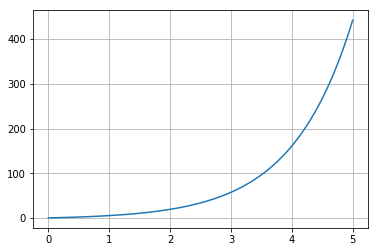

In [5]:
print("Функция:")
plt.plot(x,y_rk)
plt.grid()
plt.show()

Как видно из графика, первая производная в нуле не похожа на $tg(y/x)=3$. Необходимо подключить другой метод вычисления. 
Добавим прогноз по схеме: 

$$ Y^*_{n+1} = Y_{Ругне-Кутты} $$
$$ Y_{n+1} = Y_n + hF(x_{n+1}, Y^*_{n+1}) $$

Проверим сначала с одной итерацией коррекции



In [6]:
#Создаём массив решения
y_mat1=np.zeros((5,n))
y_mat1[0][0]=y_0[0][0]
y_mat1[1][0]=y_0[1][0]
y_mat1[2][0]=y_0[2][0]
y_mat1[3][0]=y_0[3][0]
y_mat1[4][0]=y_0[4][0]

#Решаем и заполняем его
for i in range(1,n):
    y_prev=np.zeros((5,1))
    y_prev[0][0]=y_mat1[0][i-1]
    y_prev[1][0]=y_mat1[1][i-1]
    y_prev[2][0]=y_mat1[2][i-1]
    y_prev[3][0]=y_mat1[3][i-1]
    y_prev[4][0]=y_mat1[4][i-1]
    y_curr=np.zeros((5,1))
    k1=F((i-1)*h,y_prev)[0]
    k2=F(h*(i-0.5),y_prev+0.5*h*k1)[0]
    k3=F(h*(i-0.5),y_prev+0.5*h*k2)[0]
    k4=F(h*(i),y_prev+h*k3)[0]
    y_curr=y_prev+(k1+2*k2+2*k3+k4)*h/6

    #на этом этапе получен прогноз, далее коррекция
    
    y_curr=y_prev+h*F((i-1),y_curr)
    
    #завершены итреации коррекции
    
    y_mat1[0][i]=y_curr[0][0]
    y_mat1[1][i]=y_curr[1][0]
    y_mat1[2][i]=y_curr[2][0]
    y_mat1[3][i]=y_curr[3][0]
    y_mat1[4][i]=y_curr[4][0]
y_pk=np.zeros((n))
for i in range(n):
    y_pk[i]=y_mat1[0][i]

Функция:


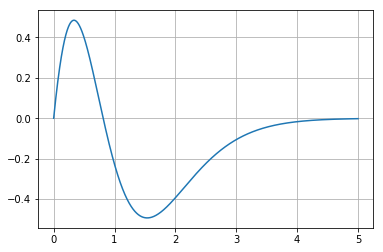

In [7]:
print("Функция:")
plt.plot(x,y_pk)
plt.grid()
plt.show()

Даже одна итерация коррекции существенно изменила характер функции, при этом, очевидно, первая производная в $x=0$ равна 3. Увеличим итерации коррекции, чтобы посмотреть на поведение точности

In [8]:
#Создаём массив решения
y_mat2=np.zeros((5,n))
y_mat2[0][0]=y_0[0][0]
y_mat2[1][0]=y_0[1][0]
y_mat2[2][0]=y_0[2][0]
y_mat2[3][0]=y_0[3][0]
y_mat2[4][0]=y_0[4][0]

#Решаем и заполняем его
for i in range(1,n):
    y_prev=np.zeros((5,1))
    y_prev[0][0]=y_mat2[0][i-1]
    y_prev[1][0]=y_mat2[1][i-1]
    y_prev[2][0]=y_mat2[2][i-1]
    y_prev[3][0]=y_mat2[3][i-1]
    y_prev[4][0]=y_mat2[4][i-1]
    y_curr=np.zeros((5,1))
    k1=F((i-1)*h,y_prev)[0]
    k2=F(h*(i-0.5),y_prev+0.5*h*k1)[0]
    k3=F(h*(i-0.5),y_prev+0.5*h*k2)[0]
    k4=F(h*(i),y_prev+h*k3)[0]
    y_curr=y_prev+(k1+2*k2+2*k3+k4)*h/6

    #на этом этапе получен прогноз, далее коррекция
    
    y_curr=y_prev+h*F((i-1),y_curr)
    y_curr=y_prev+h*F((i-1),y_curr)
    
    #завершены итреации коррекции
    
    y_mat2[0][i]=y_curr[0][0]
    y_mat2[1][i]=y_curr[1][0]
    y_mat2[2][i]=y_curr[2][0]
    y_mat2[3][i]=y_curr[3][0]
    y_mat2[4][i]=y_curr[4][0]
y_pk2=np.zeros((n))
y_delta=np.zeros((n))
for i in range(n):
    y_pk2[i]=y_mat2[0][i]
    y_delta[i]=y_pk2[i]-y_pk[i]

Функция:


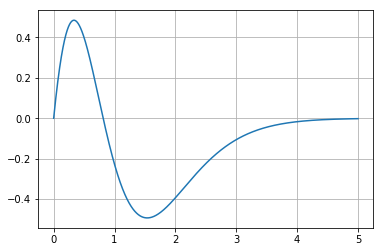

In [9]:
print("Функция:")
plt.plot(x,y_pk2)
plt.grid()
plt.show()

Разница между решениями с одной и двумя итерациями коррекции:


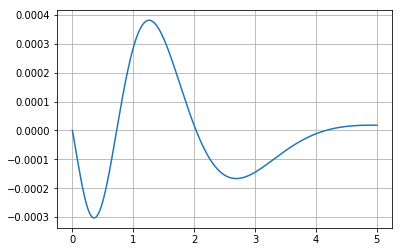

0.00038157637911256925


In [11]:
print("Разница между решениями с одной и двумя итерациями коррекции:")
plt.plot(x,y_delta)
plt.grid()
plt.show()

max_delta = y_delta[0]
for i in range(1,n):
    if(y_delta[i]>abs(max_delta)):
        max_delta=abs(y_delta[i])
print(max_delta)

Максимальное значение разницы по модулю не превышает 0,04 для шага 0,01, и 0,004 для шага 0,001, и 0,0004 для шага 0,0001. Увеличим итерации коррекции.

In [12]:
#Создаём массив решения
y_mat3=np.zeros((5,n))
y_mat3[0][0]=y_0[0][0]
y_mat3[1][0]=y_0[1][0]
y_mat3[2][0]=y_0[2][0]
y_mat3[3][0]=y_0[3][0]
y_mat3[4][0]=y_0[4][0]

#Решаем и заполняем его
for i in range(1,n):
    y_prev=np.zeros((5,1))
    y_prev[0][0]=y_mat3[0][i-1]
    y_prev[1][0]=y_mat3[1][i-1]
    y_prev[2][0]=y_mat3[2][i-1]
    y_prev[3][0]=y_mat3[3][i-1]
    y_prev[4][0]=y_mat3[4][i-1]
    y_curr=np.zeros((5,1))
    k1=F((i-1)*h,y_prev)[0]
    k2=F(h*(i-0.5),y_prev+0.5*h*k1)[0]
    k3=F(h*(i-0.5),y_prev+0.5*h*k2)[0]
    k4=F(h*(i),y_prev+h*k3)[0]
    y_curr=y_prev+(k1+2*k2+2*k3+k4)*h/6

    #на этом этапе получен прогноз, далее коррекция
    
    y_curr=y_prev+h*F((i-1),y_curr)
    y_curr=y_prev+h*F((i-1),y_curr)
    y_curr=y_prev+h*F((i-1),y_curr)
    
    #завершены итреации коррекции
    
    y_mat3[0][i]=y_curr[0][0]
    y_mat3[1][i]=y_curr[1][0]
    y_mat3[2][i]=y_curr[2][0]
    y_mat3[3][i]=y_curr[3][0]
    y_mat3[4][i]=y_curr[4][0]
y_pk3=np.zeros((n))
y_delta1=np.zeros((n))
for i in range(n):
    y_pk3[i]=y_mat2[0][i]
    y_delta1[i]=y_pk3[i]-y_pk2[i]

Функция:


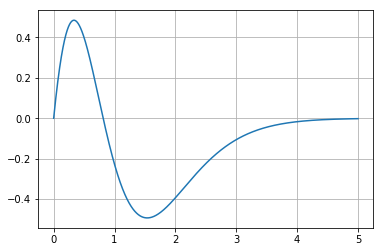

In [13]:
print("Функция:")
plt.plot(x,y_pk3)
plt.grid()
plt.show()

Разница между решениями с двумя и тремя итерациями проверки:


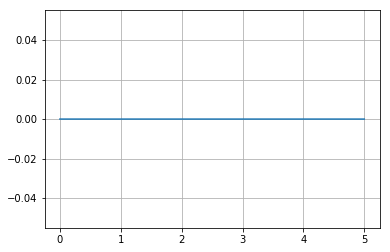

In [14]:
print("Разница между решениями с двумя и тремя итерациями проверки:")
plt.plot(x,y_delta1)
plt.grid()
plt.show()

Максимум точности достигнут на второй итерации и укладывается в рамки 4h для нескольких значений h. Если при постановке задачи задана конкретная точность $\epsilon$, то необходимо подобрать шаг таким образом, чтобы $|4h|<\epsilon$. 